In [14]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from PIL import Image
import os
from tifffile import imread
import matplotlib.pyplot as plt
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from plot_utils import singleplot, plotXY, doubleplot
from GaussFit import StripFit, Linescan
from HoughLine import show_hough_linetransform, show_ransac_points_line

In [15]:
targetdir = '/Users/aimachine/Downloads/h_variation/Actin20/Result/'

Actinimage = '/Users/aimachine/Downloads/h_variation/Actin20/ActinLineScan.tif'

Membraneimage = '/Users/aimachine/Downloads/h_variation/Actin20/MembraneLineScan.tif'

#Enter time unit in seconds
Time_unit = 1
#Enter pixel to micrometer conversion
Xcalibration = 0.069
#Enter the number of pixels to be included in the fit
FitaroundInside = 20
FitaroundOutside = 30
#Symmetric psf as input (micrometers)
psf = 0.170
inisigmaguess =  psf/Xcalibration

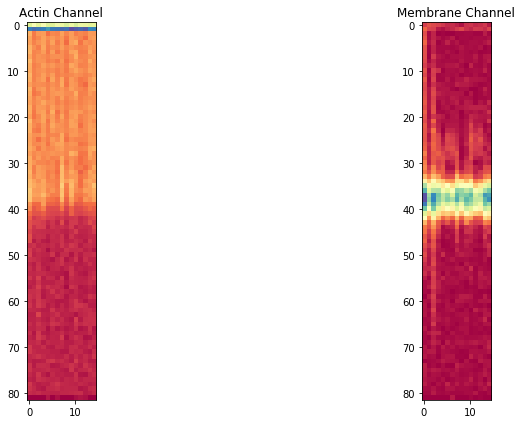

In [16]:
Actin = imread(Actinimage)
Membrane = imread(Membraneimage)
doubleplot(Actin, Membrane, 'Actin Channel', 'Membrane Channel')


/Users/aimachine/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Time point: 0


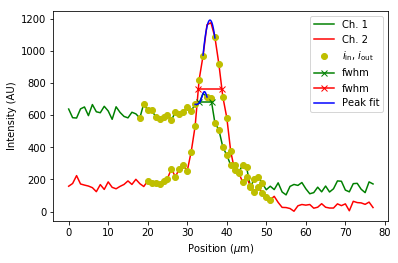

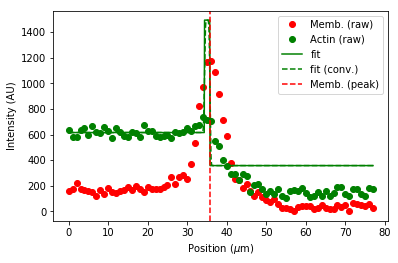

Time point: 10


/Users/aimachine/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/aimachine/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


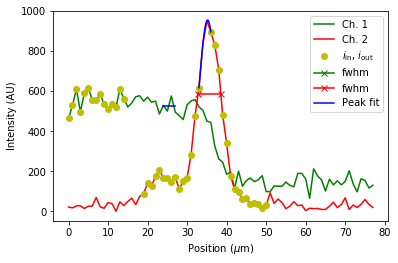

/Users/aimachine/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/aimachine/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/aimachine/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


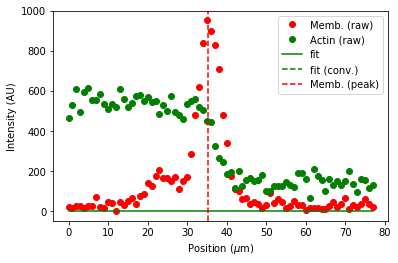

Ransac Slope =  1.011e-02
Regression Slope =  nan
Mean Thickness (After outlier removal) =  0.217 um


/Users/aimachine/anaconda3/lib/python3.6/site-packages/skimage/measure/fit.py:928: RuntimeWarning: invalid value encountered in less
  sample_model_inliers = sample_model_residuals < residual_threshold


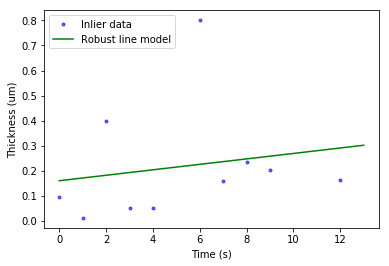

CPU times: user 9.05 s, sys: 70.3 ms, total: 9.12 s
Wall time: 9.12 s


In [17]:
%%time
Thickness, Time = StripFit(Actin, Membrane, Time_unit, Xcalibration, FitaroundInside, FitaroundOutside, psf, inisigmaguess)
Thickness_time = np.column_stack([Time, Thickness])

show_ransac_points_line(Thickness_time, min_samples=2, residual_threshold=0.5, max_trials=1000, Xrange = Time[-1], displayoutlier = False)